In [1]:
# -*- coding:utf-8 -*-
# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

In [27]:
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return cut_text

In [28]:
# 数据加载
data = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
# 将数据放到transactions中
transactions=[]
# 存储key:value
item_count={}
for i in range(0, data.shape[0]):
    temp=[]
    for j in range(0, data.shape[1]):
        item=str(data.values[i, j])
        if item != 'nan':
            temp.append(item)
            if item not in item_count:
                item_count[item]=1
            else:
                item_count[item]+=1
    transactions.append(temp)

根据词频，开始生成词云!


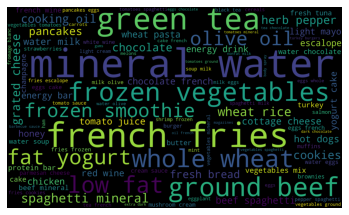

TOP10商品： [('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713)]


In [44]:
#生成词云
all_word=''
for i in transactions:
    all_word=all_word+' '+' '.join(i)

create_word_cloud(all_word)

#输出TOP10商品
print('TOP10商品：',sorted(item_count.items(), key=lambda x:x[1], reverse=True)[:10])